In [1]:
import pandas as pd
import numpy as np
Lines= []
f = open(r'C:\Users\katuwawalaai\Proposal_Analysis\DisprotDissimilar_319.txt')
for line in f:
    data_line = line.rstrip().split('\t')
    Lines.append(data_line)

In [2]:
Uniprot_ID=[]
AA_Sequence =[]
Disorder_Annotations =[]
Protein_Annotations =[]
NUC_Annotations =[]
J = len(Lines)-4
b =0
for b in range(0,J,5):
    Uniprot_ID.append(Lines[b][0])
    AA_Sequence.append(list(Lines[b+1][0]))
    Disorder_Annotations.append(list(Lines[b+2][0]))
    Protein_Annotations.append(list(Lines[b+3][0]))
    NUC_Annotations.append(list(Lines[b+4][0]))

In [3]:
Lines= []
f = open(r'C:\Users\katuwawalaai\Proposal_Analysis\DisprotDissimilar_319Predictions.txt')
for line in f:
    data_line = line.rstrip().split('\t')
    Lines.append(data_line)

In [4]:
Uniprot_ID=[]
IUPSBinary_byProteins =[]
IUPSScore_byProteins =[]
IUPLBinary_byProteins=[]
IUPLScore_byProteins=[]
EspXBinary_byProteins=[]
EspXScore_byProteins=[]
EspDBinary_byProteins=[]
EspDScore_byProteins=[]
EspNBinary_byProteins=[]
EspNScore_byProteins=[]
DisHLBinary_byProteins=[]
DisHLScore_byProteins=[]
Vsl2bBinary_byProteins=[]
Vsl2bScore_byProteins=[]
GlobBinary_byProteins=[]
GlobScore_byProteins=[]
DisopredBinary_byProteins=[]
DisopredScore_byProteins=[]
SpotBinary_byProteins=[]
SpotScore_byProteins=[]
J = len(Lines)-20
b =0
for b in range(0,J,21):
    Uniprot_ID.append(Lines[b][0])
    IUPSBinary_byProteins.append(list(Lines[b+1][0])) 
    IUPSScore_byProteins.append((Lines[b+2][0].rstrip().split(',')))  
    IUPLBinary_byProteins.append(list(Lines[b+3][0]))  
    IUPLScore_byProteins.append((Lines[b+4][0].rstrip().split(',')))  
    EspXBinary_byProteins.append(list(Lines[b+5][0]))   
    EspXScore_byProteins.append((Lines[b+6][0].rstrip().split(',')))  
    EspDBinary_byProteins.append(list(Lines[b+7][0])) 
    EspDScore_byProteins.append((Lines[b+8][0].rstrip().split(',')))  
    EspNBinary_byProteins.append(list(Lines[b+9][0]))  
    EspNScore_byProteins.append((Lines[b+10][0].rstrip().split(',')))  
    DisHLBinary_byProteins.append(list(Lines[b+11][0])) 
    DisHLScore_byProteins.append((Lines[b+12][0].rstrip().split(',')))  
    Vsl2bBinary_byProteins.append(list(Lines[b+13][0]))  
    Vsl2bScore_byProteins.append((Lines[b+14][0].rstrip().split(',')))  
    GlobBinary_byProteins.append(list(Lines[b+15][0])) 
    GlobScore_byProteins.append((Lines[b+16][0].rstrip().split(',')))  
    DisopredBinary_byProteins.append(list(Lines[b+17][0]))  
    DisopredScore_byProteins.append((Lines[b+18][0].rstrip().split(',')))  
    SpotBinary_byProteins.append(list(Lines[b+19][0]))   
    SpotScore_byProteins.append((Lines[b+20][0].rstrip().split(',')))  

In [5]:
Regions=[]
Order_Indexes=[]
b=0
for b in range(0,len(Disorder_Annotations),1):
         protein=Disorder_Annotations[b]
         sequence=AA_Sequence[b]
         regions=[]
         orderindex=[]
         c=0
         for c in range(0,len(protein),1):
                    if protein[c]=='0':
                                   regions.append(sequence[c])
                                   orderindex.append(c)
         
         ordermargins=[]
         d = 0
         for d in range(0, len(orderindex)-1 , 1):
                            if orderindex[d+1]-orderindex[d] != 1:ordermargins.append(d+1)
                        
         regionsmul=np.split(regions,ordermargins) 
         regionind=np.split(orderindex,ordermargins) # = indexes of ordered regions in each protein
         Regions.append(regionsmul)
         Order_Indexes.append(regionind)

In [6]:
Region_Reference=[]
Region_Points=[]
b=0
for b in range(0,len(Order_Indexes),1):
           sub_prots=Order_Indexes[b]
           c=0
           for c in range(0,len(sub_prots),1):
                          Region_Reference.append(str(Uniprot_ID[b])+'_R'+str(c)) # giving unique id to each region 
                          Region_Points.append([b,c])   # b,c corresponding to protein id and its region id so later we can
                                                        # easily get the indexes for corresponding region later

In [7]:
#reading the alignmnet results from individual results files generated by blastp
Lines= []
b=0
for b in range(1,457,1):
          try:
              f = open(r'C:\Users\katuwawalaai\Proposal_Analysis\SingleRegion_Ordered\Alignment_ResultsE1\BalstResults_'+str(b)+'.txt')
              for line in f:
                  data_line = line.rstrip().split('\t')
                  Lines.append(data_line)
          except:
                  Lines.append('')

In [8]:
OrderedReg=[]
Identity=[]
E_Val=[]
b=0
for b in range(0,len(Lines),1):
     try:
         TM=Lines[b][0].split(',')
         OrderedReg.append(TM[0])
         Identity.append(float(TM[2]))
         E_Val.append(float(TM[-2]))   
     except:
         a=2

In [9]:
Mapped_Regions=[]
b=0
for b in range(0,len(OrderedReg),1):
    if E_Val[b]<1.0:Mapped_Regions.append(OrderedReg[b])

In [10]:
Region_Reference.reverse()
Region_Points.reverse()

In [11]:
def DeletebadOrder(Input_List):
            b=0
            for b in range(0,len(Region_Reference),1):
                if Region_Reference[b][1:] not in Mapped_Regions: 
                                        points=Region_Points[b]
                                        target_list=Input_List[points[0]] # getting annotation list that we gonna modify
                                        dele_indexes=Order_Indexes[points[0]][points[1]] # getting indexes to be deleted
                                        new_anno=np.delete(target_list, dele_indexes).tolist() # delete the un mapped ordered indexes and making a new list
                                        Input_List[points[0]]=new_anno # assigning modified array to designated position

In [12]:
# calculating disorder fractions of all proteins before oreder region refinement
Order_Count= [] 
Disorder_Fraction=[]
Length=[]
c=0
for c in range(0,len(Disorder_Annotations),1):
                 order=0
                 disorder =0
                 Annotation=Disorder_Annotations[c]
                 Length.append(len(Annotation))
                 b=0
                 for b in range(0, len(Annotation), 1):
                                      if Annotation[b] == '0': order = order+1
                                      elif Annotation[b] == '1': disorder = disorder+1
                 Order_Count.append(order)
                 Disorder_Fraction.append(disorder/len(Annotation))
Complete_Fractions=Disorder_Fraction

In [13]:
# taking the indexes of naturally fully disordered proteins
OriFullDis_Proteins=[]
b=0
for b in range(0,len(Complete_Fractions),1):
              if Complete_Fractions[b] ==1.0:OriFullDis_Proteins.append(b)

In [14]:
len(OriFullDis_Proteins)

38

In [15]:
DeletebadOrder(Disorder_Annotations)
DeletebadOrder(Protein_Annotations)
DeletebadOrder(NUC_Annotations)

C:\Users\katuwawalaai\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  


In [16]:
DeletebadOrder(IUPSBinary_byProteins)
DeletebadOrder(IUPSScore_byProteins)
DeletebadOrder(IUPLBinary_byProteins)
DeletebadOrder(IUPLScore_byProteins)
DeletebadOrder(EspXBinary_byProteins)
DeletebadOrder(EspXScore_byProteins)
DeletebadOrder(EspDBinary_byProteins)
DeletebadOrder(EspDScore_byProteins)
DeletebadOrder(EspNBinary_byProteins)
DeletebadOrder(EspNScore_byProteins)
DeletebadOrder(DisHLBinary_byProteins)
DeletebadOrder(DisHLScore_byProteins)
DeletebadOrder(Vsl2bBinary_byProteins)
DeletebadOrder(Vsl2bScore_byProteins)
DeletebadOrder(GlobBinary_byProteins)
DeletebadOrder(GlobScore_byProteins)
DeletebadOrder(DisopredBinary_byProteins)
DeletebadOrder(DisopredScore_byProteins)
DeletebadOrder(SpotBinary_byProteins)
DeletebadOrder(SpotScore_byProteins)

C:\Users\katuwawalaai\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  


In [17]:
# calculating disorder fractions of all proteins after oreder region refinement
Order_Count= [] 
Disorder_Fraction=[]
Length=[]
c=0
for c in range(0,len(Disorder_Annotations),1):
                 order=0
                 disorder =0
                 Annotation=Disorder_Annotations[c]
                 Length.append(len(Annotation))
                 b=0
                 for b in range(0, len(Annotation), 1):
                                      if Annotation[b] == '0': order = order+1
                                      elif Annotation[b] == '1': disorder = disorder+1
                 Order_Count.append(order)
                 Disorder_Fraction.append(disorder/len(Annotation))
Complete_Fractions=Disorder_Fraction

In [18]:
# taking the indexes of both naturally fully disordered proteins and artificially fully disordered proteins
ArtiFullDis_Proteins=[]
b=0
for b in range(0,len(Complete_Fractions),1):
              if Complete_Fractions[b] ==1.0:ArtiFullDis_Proteins.append(b)

In [19]:
len(ArtiFullDis_Proteins)

109

In [20]:
# adding  all non fully disordered proteins
New_Disorder_Annotations =[]
New_Protein_Annotations =[]
New_NUC_Annotations =[]

New_IUPSBinary_byProteins =[]
New_IUPSScore_byProteins =[]
New_IUPLBinary_byProteins=[]
New_IUPLScore_byProteins=[]
New_EspXBinary_byProteins=[]
New_EspXScore_byProteins=[]
New_EspDBinary_byProteins=[]
New_EspDScore_byProteins=[]
New_EspNBinary_byProteins=[]
New_EspNScore_byProteins=[]
New_DisHLBinary_byProteins=[]
New_DisHLScore_byProteins=[]
New_Vsl2bBinary_byProteins=[]
New_Vsl2bScore_byProteins=[]
New_GlobBinary_byProteins=[]
New_GlobScore_byProteins=[]
New_DisopredBinary_byProteins=[]
New_DisopredScore_byProteins=[]
New_SpotBinary_byProteins=[]
New_SpotScore_byProteins=[]


In [21]:
b=0
for b in range(0,len(Disorder_Annotations),1):
#           if Complete_Fractions[b] ==1.0:
                  New_Disorder_Annotations.append(list(map(int, Disorder_Annotations[b])))
                  New_Protein_Annotations.append(list(map(int, Protein_Annotations[b])))
                  New_NUC_Annotations.append(list(map(int, NUC_Annotations[b])))
                  New_IUPSBinary_byProteins.append(list(map(int, IUPSBinary_byProteins[b])))
                  New_IUPSScore_byProteins.append(list(map(float, IUPSScore_byProteins[b])))
                  New_IUPLBinary_byProteins.append(list(map(int, IUPLBinary_byProteins[b])))
                  New_IUPLScore_byProteins.append(list(map(float, IUPLScore_byProteins[b])))
                  New_EspXBinary_byProteins.append(list(map(int, EspXBinary_byProteins[b])))
                  New_EspXScore_byProteins.append(list(map(float, EspXScore_byProteins[b])))
                  New_EspDBinary_byProteins.append(list(map(int, EspDBinary_byProteins[b])))
                  New_EspDScore_byProteins.append(list(map(float, EspDScore_byProteins[b])))
                  New_EspNBinary_byProteins.append(list(map(int, EspNBinary_byProteins[b])))
                  New_EspNScore_byProteins.append(list(map(float, EspNScore_byProteins[b])))
                  New_DisHLBinary_byProteins.append(list(map(int, DisHLBinary_byProteins[b])))
                  New_DisHLScore_byProteins.append(list(map(float, DisHLScore_byProteins[b])))
                  New_Vsl2bBinary_byProteins.append(list(map(int, Vsl2bBinary_byProteins[b])))
                  New_Vsl2bScore_byProteins.append(list(map(float, Vsl2bScore_byProteins[b])))
                  New_GlobBinary_byProteins.append(list(map(int, GlobBinary_byProteins[b])))
                  New_GlobScore_byProteins.append(list(map(float, GlobScore_byProteins[b])))
                  New_DisopredBinary_byProteins.append(list(map(int, DisopredBinary_byProteins[b])))
                  New_DisopredScore_byProteins.append(list(map(float, DisopredScore_byProteins[b])))
                  New_SpotBinary_byProteins.append(list(map(int, SpotBinary_byProteins[b])))
                  New_SpotScore_byProteins.append(list(map(float, SpotScore_byProteins[b])))

In [22]:
len(New_Disorder_Annotations)

319

# adding  naturally fully disordered proteins
for b in OriFullDis_Proteins:
                  New_Disorder_Annotations.append(list(map(int, Disorder_Annotations[b])))
                  New_Protein_Annotations.append(list(map(int, Protein_Annotations[b])))
                  New_NUC_Annotations.append(list(map(int, NUC_Annotations[b])))
                  New_IUPSBinary_byProteins.append(list(map(int, IUPSBinary_byProteins[b])))
                  New_IUPSScore_byProteins.append(list(map(float, IUPSScore_byProteins[b])))
                  New_IUPLBinary_byProteins.append(list(map(int, IUPLBinary_byProteins[b])))
                  New_IUPLScore_byProteins.append(list(map(float, IUPLScore_byProteins[b])))
                  New_EspXBinary_byProteins.append(list(map(int, EspXBinary_byProteins[b])))
                  New_EspXScore_byProteins.append(list(map(float, EspXScore_byProteins[b])))
                  New_EspDBinary_byProteins.append(list(map(int, EspDBinary_byProteins[b])))
                  New_EspDScore_byProteins.append(list(map(float, EspDScore_byProteins[b])))
                  New_EspNBinary_byProteins.append(list(map(int, EspNBinary_byProteins[b])))
                  New_EspNScore_byProteins.append(list(map(float, EspNScore_byProteins[b])))
                  New_DisHLBinary_byProteins.append(list(map(int, DisHLBinary_byProteins[b])))
                  New_DisHLScore_byProteins.append(list(map(float, DisHLScore_byProteins[b])))
                  New_Vsl2bBinary_byProteins.append(list(map(int, Vsl2bBinary_byProteins[b])))
                  New_Vsl2bScore_byProteins.append(list(map(float, Vsl2bScore_byProteins[b])))
                  New_GlobBinary_byProteins.append(list(map(int, GlobBinary_byProteins[b])))
                  New_GlobScore_byProteins.append(list(map(float, GlobScore_byProteins[b])))
                  New_DisopredBinary_byProteins.append(list(map(int, DisopredBinary_byProteins[b])))
                  New_DisopredScore_byProteins.append(list(map(float, DisopredScore_byProteins[b])))
                  New_SpotBinary_byProteins.append(list(map(int, SpotBinary_byProteins[b])))
                  New_SpotScore_byProteins.append(list(map(float, SpotScore_byProteins[b])))

In [23]:
len(New_Disorder_Annotations)

319

In [24]:
Disorder_Annotations = New_Disorder_Annotations  
Protein_Annotations =New_Protein_Annotations 
NUC_Annotations =New_NUC_Annotations
IUPSBinary_byProteins =New_IUPSBinary_byProteins
IUPSScore_byProteins =New_IUPSScore_byProteins
IUPLBinary_byProteins=  New_IUPLBinary_byProteins
IUPLScore_byProteins=New_IUPLScore_byProteins
EspXBinary_byProteins=New_EspXBinary_byProteins
EspXScore_byProteins=New_EspXScore_byProteins
EspDBinary_byProteins=New_EspDBinary_byProteins
EspDScore_byProteins=New_EspDScore_byProteins
EspNBinary_byProteins=New_EspNBinary_byProteins
EspNScore_byProteins=New_EspNScore_byProteins
DisHLBinary_byProteins=New_DisHLBinary_byProteins
DisHLScore_byProteins=New_DisHLScore_byProteins
Vsl2bBinary_byProteins=New_Vsl2bBinary_byProteins
Vsl2bScore_byProteins=New_Vsl2bScore_byProteins
GlobBinary_byProteins=New_GlobBinary_byProteins
GlobScore_byProteins=New_GlobScore_byProteins
DisopredBinary_byProteins=New_DisopredBinary_byProteins
DisopredScore_byProteins=New_DisopredScore_byProteins
SpotBinary_byProteins=New_SpotBinary_byProteins
SpotScore_byProteins=New_SpotScore_byProteins

In [25]:
#Getting length of each protein to a list
Length_EachProtein = []
for b in range(0,len(Disorder_Annotations), 1):
                   c = len(Disorder_Annotations[b])
                   Length_EachProtein.append(c)



In [26]:
len(Protein_Annotations)

319

In [27]:
Annotations_Normal = np.concatenate(Disorder_Annotations) 
Protein_Normal = np.concatenate(Protein_Annotations) 
NUC_Normal = np.concatenate(NUC_Annotations) 

IUPSBinary_Normal =np.concatenate(IUPSBinary_byProteins)
IUPSScore_Normal =np.concatenate(IUPSScore_byProteins)
IUPLBinary_Normal=np.concatenate(IUPLBinary_byProteins)
IUPLScore_Normal=np.concatenate(IUPLScore_byProteins)
EspXBinary_Normal=np.concatenate(EspXBinary_byProteins)
EspXScore_Normal=np.concatenate(EspXScore_byProteins)
EspDBinary_Normal=np.concatenate(EspDBinary_byProteins)
EspDScore_Normal=np.concatenate(EspDScore_byProteins)
EspNBinary_Normal=np.concatenate(EspNBinary_byProteins)
EspNScore_Normal=np.concatenate(EspNScore_byProteins)
DisHLBinary_Normal=np.concatenate(DisHLBinary_byProteins)
DisHLScore_Normal=np.concatenate(DisHLScore_byProteins)
Vsl2bBinary_Normal=np.concatenate(Vsl2bBinary_byProteins)
Vsl2bScore_Normal=np.concatenate(Vsl2bScore_byProteins)
GlobBinary_Normal=np.concatenate(GlobBinary_byProteins)
GlobScore_Normal=np.concatenate(GlobScore_byProteins)
DisopredBinary_Normal=np.concatenate(DisopredBinary_byProteins)
DisopredScore_Normal=np.concatenate(DisopredScore_byProteins)
SpotBinary_Normal=np.concatenate(SpotBinary_byProteins)
SpotScore_Normal=np.concatenate(SpotScore_byProteins)

In [28]:
from sklearn.metrics import roc_auc_score, matthews_corrcoef, accuracy_score, average_precision_score, confusion_matrix
DisHL_cm = confusion_matrix(Annotations_Normal,DisHLBinary_Normal) 
EspD_cm = confusion_matrix(Annotations_Normal, EspDBinary_Normal)
EspN_cm = confusion_matrix(Annotations_Normal, EspNBinary_Normal)
EspX_cm = confusion_matrix(Annotations_Normal, EspXBinary_Normal)
Glob_cm = confusion_matrix(Annotations_Normal, GlobBinary_Normal)
IUPL_cm = confusion_matrix(Annotations_Normal, IUPLBinary_Normal)
IUPS_cm = confusion_matrix(Annotations_Normal, IUPSBinary_Normal)
Vsl2b_cm = confusion_matrix(Annotations_Normal,Vsl2bBinary_Normal)
Disopred_cm = confusion_matrix(Annotations_Normal, DisopredBinary_Normal)
Spot_cm = confusion_matrix(Annotations_Normal, SpotBinary_Normal)
res = pd.DataFrame(columns=['Sen'], index=['DisHL','EspD','EspN','EspX','Glob','IUPL','IUPS','Vsl2b','Disopred','Spot'])
res.loc['DisHL','Sen'] = DisHL_cm[1,1] / float (DisHL_cm[1,0]+DisHL_cm[1,1])
res.loc['EspD', 'Sen'] = EspD_cm[1,1] / float (EspD_cm[1,0]+EspD_cm[1,1])
res.loc['EspN', 'Sen'] = EspN_cm[1,1] / float (EspN_cm[1,0]+EspN_cm[1,1])
res.loc['EspX', 'Sen'] = EspX_cm[1,1] / float (EspX_cm[1,0]+EspX_cm[1,1])
res.loc['Glob', 'Sen'] = Glob_cm[1,1] / float (Glob_cm[1,0]+Glob_cm[1,1])
res.loc['IUPL', 'Sen'] = IUPL_cm[1,1] / float (IUPL_cm[1,0]+IUPL_cm[1,1])
res.loc['IUPS', 'Sen'] = IUPS_cm[1,1] / float (IUPS_cm[1,0]+IUPS_cm[1,1])
res.loc['Vsl2b','Sen'] = Vsl2b_cm[1,1] / float (Vsl2b_cm[1,0]+Vsl2b_cm[1,1])
res.loc['Disopred','Sen'] = Disopred_cm[1,1] / float (Disopred_cm[1,0]+Disopred_cm[1,1])
res.loc['Spot','Sen'] = Spot_cm[1,1] / float (Spot_cm[1,0]+Spot_cm[1,1])
res.astype(float).round(3)

,Sen
DisHL,0.439
EspD,0.487
EspN,0.721
EspX,0.623
Glob,0.428
IUPL,0.693
IUPS,0.613
Vsl2b,0.845
Disopred,0.653
Spot,0.756


In [29]:
ID_List=['K7ZP88',
 'Q3S2T9',
 'Q939N5',
 'A0A221ZS22',
 'Q15782',
 'Q7YS85',
 'Q6TMG6',
 'Q8B3M2',
 'Q8G9Q2',
 'Q3JLD6',
 'A0A0K0MCJ4',
 'Q93008',
 'E2JF22',
 'Q8TEP8',
 'V5M2P5',
 'Q2FUW1',
 'Q00416',
 'Q6GWS2',
 'P96202',
 'A0AEF4',
 'Q9VG78',
 'A0A0H2YST8',
 'Q5J1Q6',
 'Q84HI8',
 'Q8IY92',
 'I6X8D2',
 'Q89444',
 'A0A0H2YN38',
 'P29400',
 'Q8TCU6',
 'Q70Z35',
 'P76578',
 'Q9GRZ3',
 'P38198',
 'G0SB58',
 'A0A2D0TCJ6',
 'Q8TEQ6',
 'Q5ZTK4']

In [30]:
# read the predictions only required
IUPS_PDB=[]
IUPL_PDB=[]
EspX_PDB=[]
EspD_PDB=[]
EspN_PDB=[]
DisHL_PDB=[]
Vsl2b_PDB=[]
Glob_PDB=[]

b=0
for b in range(0,len(ID_List),1):
                    Lines= []
                    f = open(r'C:\Users\katuwawalaai\Proposal_Analysis\DisorderPred_AdditionalPDB/'+ID_List[b]+'_DisorderPred.txt')
                    for line in f:
                        data_line = line.rstrip().split('\t')
                        Lines.append(data_line)
                    Length_EachProtein.append(len(Lines)-1)
                    
                    c=0
                    for c in range(1,len(Lines),1):
                              IUPS_PDB.append(float(Lines[c][2]))
                              IUPL_PDB.append(float(Lines[c][3]))
                              EspX_PDB.append(float(Lines[c][4]))
                              EspD_PDB.append(float(Lines[c][5]))
                              EspN_PDB.append(float(Lines[c][6]))
                              DisHL_PDB.append(float(Lines[c][7]))
                              Vsl2b_PDB.append(float(Lines[c][8]))
                              Glob_PDB.append(float(Lines[c][9]))

In [31]:
min(Length_EachProtein)

7

In [32]:
#Getting continous sum off  proteins to an array
d=np.cumsum(Length_EachProtein)

In [33]:
len(IUPS_PDB)

75513

In [34]:
Disopred = pd.read_csv(r"C:\Users\katuwawalaai\Proposal_Analysis\DisorderPred_AdditionalPDB\AdditionalPDB_DisopredResult.txt", comment=">", delim_whitespace= True, names =['ResidueNo', 'AA', 'Prediction_Score', 'ProtBind_Score'], dtype={'ResidueNo':int, 'AA':str, 'Prediction_Score': np.float64, 'ProtBind_Score':np.float64}, skiprows=1, header=None)
Disopred_PDB = Disopred.loc[:,('Prediction_Score')].values

In [35]:
Spot = pd.read_csv(r"C:\Users\katuwawalaai\Proposal_Analysis\DisorderPred_AdditionalPDB\AdditionalPDB_SpotResult.txt", comment=">", delim_whitespace= True, names =['ResidueNo', 'AA', 'Prediction_Score', 'Label'], dtype={'ResidueNo':int, 'AA':str, 'Prediction_Score': np.float64, 'Label':str}, skiprows=1, header=None)
Spot_PDB = Spot.loc[:,('Prediction_Score')].values

In [36]:
def Score_Binary(Score,t):
                     Binary=[]
                     b=0
                     for b in range(0,len(Score),1):
                            if Score[b]>=t:Binary.append(1)
                            else:Binary.append(0)
                     return Binary   

In [37]:
IUPS_BinaryPDB=Score_Binary(IUPS_PDB,0.5)
IUPL_BinaryPDB=Score_Binary(IUPL_PDB,0.5)
EspX_BinaryPDB=Score_Binary(EspX_PDB,0.143)
EspD_BinaryPDB=Score_Binary(EspD_PDB,0.507)
EspN_BinaryPDB=Score_Binary(EspN_PDB,0.309)
DisHL_BinaryPDB=Score_Binary(DisHL_PDB,0.5)
Vsl2b_BinaryPDB=Score_Binary(Vsl2b_PDB,0.5)
Glob_BinaryPDB=Score_Binary(Glob_PDB,0.0)
Disopred_BinaryPDB=Score_Binary(Disopred_PDB,0.5)
Spot_BinaryPDB=Score_Binary(Spot_PDB,0.49)

In [38]:
PDB_Annotation=np.zeros((len(Spot_BinaryPDB),),dtype=int)

In [39]:
IUPSScore_Composite = list(IUPSScore_Normal) + IUPS_PDB
IUPLScore_Composite=list(IUPLScore_Normal)+IUPL_PDB
EspXScore_Composite=list(EspXScore_Normal)+EspX_PDB 
EspDScore_Composite=list(EspDScore_Normal)+EspD_PDB 
EspNScore_Composite=list(EspNScore_Normal)+EspN_PDB
DisHLScore_Composite=list(DisHLScore_Normal)+DisHL_PDB
Vsl2bScore_Composite=list(Vsl2bScore_Normal)+Vsl2b_PDB
GlobScore_Composite=list(GlobScore_Normal)+Glob_PDB 
DisopredScore_Composite=list(DisopredScore_Normal)+list(Disopred_PDB)
SpotScore_Composite=list(SpotScore_Normal)+list(Spot_PDB)

IUPSBinary_Composite=list(IUPSBinary_Normal)+IUPS_BinaryPDB 
IUPLBinary_Composite=list(IUPLBinary_Normal)+IUPL_BinaryPDB
EspXBinary_Composite=list(EspXBinary_Normal)+EspX_BinaryPDB 
EspDBinary_Composite=list(EspDBinary_Normal)+EspD_BinaryPDB 
EspNBinary_Composite=list(EspNBinary_Normal)+EspN_BinaryPDB 
DisHLBinary_Composite=list(DisHLBinary_Normal)+DisHL_BinaryPDB 
Vsl2bBinary_Composite=list(Vsl2bBinary_Normal)+Vsl2b_BinaryPDB 
GlobBinary_Composite=list(GlobBinary_Normal)+Glob_BinaryPDB
DisopredBinary_Composite=list(DisopredBinary_Normal)+Disopred_BinaryPDB 
SpotBinary_Composite=list(SpotBinary_Normal)+Spot_BinaryPDB

Annotations_Composite=list(Annotations_Normal)+list(PDB_Annotation)
Protein_Composite=list(Protein_Normal)+list(PDB_Annotation)
NUC_Composite=list(NUC_Normal)+list(PDB_Annotation)

In [40]:
from sklearn.metrics import roc_auc_score, matthews_corrcoef, accuracy_score, average_precision_score, confusion_matrix

Func_Disorder=Annotations_Composite

Func_DisHL_Score=DisHLScore_Composite      
Func_EspD_Score=EspDScore_Composite
Func_EspN_Score=EspNScore_Composite
Func_EspX_Score=EspXScore_Composite
Func_Glob_Score=GlobScore_Composite
Func_IUPL_Score=IUPLScore_Composite
Func_IUPS_Score=IUPSScore_Composite
Func_Vsl2b_Score=Vsl2bScore_Composite
Func_Disopred_Score=DisopredScore_Composite
Func_Spot_Score=SpotScore_Composite

Func_DisHL_Binary=DisHLBinary_Composite
Func_EspD_Binary=EspDBinary_Composite
Func_EspN_Binary=EspNBinary_Composite
Func_EspX_Binary=EspXBinary_Composite
Func_Glob_Binary=GlobBinary_Composite
Func_IUPL_Binary=IUPLBinary_Composite
Func_IUPS_Binary=IUPSBinary_Composite
Func_Vsl2b_Binary=Vsl2bBinary_Composite
Func_Disopred_Binary=DisopredBinary_Composite
Func_Spot_Binary=SpotBinary_Composite

DisHL_cm = confusion_matrix(Func_Disorder,Func_DisHL_Binary)
EspD_cm = confusion_matrix(Func_Disorder, Func_EspD_Binary)
EspN_cm = confusion_matrix(Func_Disorder, Func_EspN_Binary)
EspX_cm = confusion_matrix(Func_Disorder, Func_EspX_Binary)
Glob_cm = confusion_matrix(Func_Disorder, Func_Glob_Binary)
IUPL_cm = confusion_matrix(Func_Disorder, Func_IUPL_Binary)
IUPS_cm = confusion_matrix(Func_Disorder, Func_IUPS_Binary)
Vsl2b_cm = confusion_matrix(Func_Disorder,Func_Vsl2b_Binary)
Disopred_cm = confusion_matrix(Func_Disorder, Func_Disopred_Binary)
Spot_cm = confusion_matrix(Func_Disorder, Func_Spot_Binary)

res = pd.DataFrame(columns=['AUC','PR','Sen','FPR','MCC'], index=['DisHL','EspD','EspN','EspX','Glob','IUPL','IUPS','Vsl2b','Disopred','Spot'])
res.loc['DisHL','AUC'] = roc_auc_score(Func_Disorder,Func_DisHL_Score)
res.loc['EspD', 'AUC'] = roc_auc_score(Func_Disorder,Func_EspD_Score)
res.loc['EspN', 'AUC'] = roc_auc_score(Func_Disorder,Func_EspN_Score)
res.loc['EspX', 'AUC'] = roc_auc_score(Func_Disorder,Func_EspX_Score)
res.loc['Glob', 'AUC'] = roc_auc_score(Func_Disorder,Func_Glob_Score)
res.loc['IUPL', 'AUC'] = roc_auc_score(Func_Disorder,Func_IUPL_Score)
res.loc['IUPS', 'AUC'] = roc_auc_score(Func_Disorder,Func_IUPS_Score)
res.loc['Vsl2b','AUC'] = roc_auc_score(Func_Disorder,Func_Vsl2b_Score)
res.loc['Disopred','AUC'] = roc_auc_score(Func_Disorder,Func_Disopred_Score)
res.loc['Spot','AUC'] = roc_auc_score(Func_Disorder,Func_Spot_Score)
res.loc['DisHL','PR'] = average_precision_score(Func_Disorder,Func_DisHL_Score)
res.loc['EspD', 'PR'] = average_precision_score(Func_Disorder,Func_EspD_Score)
res.loc['EspN', 'PR'] = average_precision_score(Func_Disorder,Func_EspN_Score)
res.loc['EspX', 'PR'] = average_precision_score(Func_Disorder,Func_EspX_Score)
res.loc['Glob', 'PR'] = average_precision_score(Func_Disorder,Func_Glob_Score)
res.loc['IUPL', 'PR'] = average_precision_score(Func_Disorder,Func_IUPL_Score)
res.loc['IUPS', 'PR'] = average_precision_score(Func_Disorder,Func_IUPS_Score)
res.loc['Vsl2b','PR'] = average_precision_score(Func_Disorder,Func_Vsl2b_Score)
res.loc['Disopred','PR'] = average_precision_score(Func_Disorder,Func_Disopred_Score)
res.loc['Spot','PR'] = average_precision_score(Func_Disorder,Func_Spot_Score)
#res.loc['DisHL','ACC'] = accuracy_score(Func_Disorder,Func_DisHL_Binary)
#res.loc['EspD', 'ACC'] = accuracy_score(Func_Disorder,Func_EspD_Binary)
#res.loc['EspN', 'ACC'] = accuracy_score(Func_Disorder,Func_EspN_Binary)
#res.loc['EspX', 'ACC'] = accuracy_score(Func_Disorder,Func_EspX_Binary)
#res.loc['Glob', 'ACC'] = accuracy_score(Func_Disorder,Func_Glob_Binary)
#res.loc['IUPL', 'ACC'] = accuracy_score(Func_Disorder,Func_IUPL_Binary)
#res.loc['IUPS', 'ACC'] = accuracy_score(Func_Disorder,Func_IUPS_Binary)
#res.loc['Vsl2b','ACC'] = accuracy_score(Func_Disorder,Func_Vsl2b_Binary)
#res.loc['Disopred','ACC'] = accuracy_score(Func_Disorder,Func_Disopred_Binary)
#res.loc['Spot','ACC'] = accuracy_score(Func_Disorder,Func_Spot_Binary)
res.loc['DisHL','Sen'] = DisHL_cm[1,1] / float (DisHL_cm[1,0]+DisHL_cm[1,1])
res.loc['EspD', 'Sen'] = EspD_cm[1,1] / float (EspD_cm[1,0]+EspD_cm[1,1])
res.loc['EspN', 'Sen'] = EspN_cm[1,1] / float (EspN_cm[1,0]+EspN_cm[1,1])
res.loc['EspX', 'Sen'] = EspX_cm[1,1] / float (EspX_cm[1,0]+EspX_cm[1,1])
res.loc['Glob', 'Sen'] = Glob_cm[1,1] / float (Glob_cm[1,0]+Glob_cm[1,1])
res.loc['IUPL', 'Sen'] = IUPL_cm[1,1] / float (IUPL_cm[1,0]+IUPL_cm[1,1])
res.loc['IUPS', 'Sen'] = IUPS_cm[1,1] / float (IUPS_cm[1,0]+IUPS_cm[1,1])
res.loc['Vsl2b','Sen'] = Vsl2b_cm[1,1] / float (Vsl2b_cm[1,0]+Vsl2b_cm[1,1])
res.loc['Disopred','Sen'] = Disopred_cm[1,1] / float (Disopred_cm[1,0]+Disopred_cm[1,1])
res.loc['Spot','Sen'] = Spot_cm[1,1] / float (Spot_cm[1,0]+Spot_cm[1,1])
res.loc['DisHL','FPR'] = DisHL_cm[0,1] / float (DisHL_cm[0,0]+DisHL_cm[0,1])
res.loc['EspD', 'FPR'] = EspD_cm[0,1] / float (EspD_cm[0,0]+EspD_cm[0,1])
res.loc['EspN', 'FPR'] = EspN_cm[0,1] / float (EspN_cm[0,0]+EspN_cm[0,1])
res.loc['EspX', 'FPR'] = EspX_cm[0,1] / float (EspX_cm[0,0]+EspX_cm[0,1])
res.loc['Glob', 'FPR'] = Glob_cm[0,1] / float (Glob_cm[0,0]+Glob_cm[0,1])
res.loc['IUPL', 'FPR'] = IUPL_cm[0,1] / float (IUPL_cm[0,0]+IUPL_cm[0,1])
res.loc['IUPS', 'FPR'] = IUPS_cm[0,1] / float (IUPS_cm[0,0]+IUPS_cm[0,1])
res.loc['Vsl2b','FPR'] = Vsl2b_cm[0,1] / float (Vsl2b_cm[0,0]+Vsl2b_cm[0,1])
res.loc['Disopred','FPR'] = Disopred_cm[0,1] / float (Disopred_cm[0,0]+Disopred_cm[0,1])
res.loc['Spot','FPR'] = Spot_cm[0,1] / float (Spot_cm[0,0]+Spot_cm[0,1])
res.loc['DisHL','MCC'] = matthews_corrcoef(Func_Disorder,Func_DisHL_Binary)
res.loc['EspD', 'MCC'] = matthews_corrcoef(Func_Disorder,Func_EspD_Binary)
res.loc['EspN', 'MCC'] = matthews_corrcoef(Func_Disorder,Func_EspN_Binary)
res.loc['EspX', 'MCC'] = matthews_corrcoef(Func_Disorder,Func_EspX_Binary)
res.loc['Glob', 'MCC'] = matthews_corrcoef(Func_Disorder,Func_Glob_Binary)
res.loc['IUPL', 'MCC'] = matthews_corrcoef(Func_Disorder,Func_IUPL_Binary)
res.loc['IUPS', 'MCC'] = matthews_corrcoef(Func_Disorder,Func_IUPS_Binary)
res.loc['Vsl2b','MCC'] = matthews_corrcoef(Func_Disorder,Func_Vsl2b_Binary)
res.loc['Disopred','MCC'] = matthews_corrcoef(Func_Disorder,Func_Disopred_Binary)
res.loc['Spot','MCC'] = matthews_corrcoef(Func_Disorder,Func_Spot_Binary) 
res.astype(float).round(3)

,AUC,PR,Sen,FPR,MCC
DisHL,0.717,0.308,0.439,0.162,0.257
EspD,0.858,0.593,0.487,0.060,0.473
EspN,0.743,0.336,0.721,0.310,0.317
EspX,0.790,0.375,0.623,0.193,0.366
Glob,0.310,0.122,0.428,0.655,-0.175
IUPL,0.785,0.422,0.693,0.233,0.373
IUPS,0.788,0.431,0.613,0.170,0.386
Vsl2b,0.897,0.609,0.845,0.204,0.519
Disopred,0.724,0.294,0.653,0.293,0.283
Spot,0.795,0.334,0.756,0.261,0.390


In [41]:
IUPSScore_byProteins=np.split(IUPSScore_Composite ,d)
IUPLScore_byProteins=np.split(IUPLScore_Composite ,d)
EspXScore_byProteins=np.split(EspXScore_Composite,d)
EspDScore_byProteins=np.split(EspDScore_Composite,d)
EspNScore_byProteins=np.split(EspNScore_Composite,d)
DisHLScore_byProteins=np.split(DisHLScore_Composite,d)
Vsl2bScore_byProteins=np.split(Vsl2bScore_Composite,d)
GlobScore_byProteins=np.split(GlobScore_Composite,d)
DisopredScore_byProteins=np.split(DisopredScore_Composite,d)
SpotScore_byProteins=np.split(SpotScore_Composite,d)
Disorder_Annotations=np.split(Annotations_Composite,d)
Protein_Annotations=np.split(Protein_Composite,d)
NUC_Annotations=np.split(NUC_Composite,d)

In [42]:
IUPSBinary_byProteins=np.split(IUPSBinary_Composite ,d)
IUPLBinary_byProteins=np.split(IUPLBinary_Composite ,d)
EspXBinary_byProteins=np.split(EspXBinary_Composite,d)
EspDBinary_byProteins=np.split(EspDBinary_Composite,d)
EspNBinary_byProteins=np.split(EspNBinary_Composite,d)
DisHLBinary_byProteins=np.split(DisHLBinary_Composite,d)
Vsl2bBinary_byProteins=np.split(Vsl2bBinary_Composite,d)
GlobBinary_byProteins=np.split(GlobBinary_Composite,d)
DisopredBinary_byProteins=np.split(DisopredBinary_Composite,d)
SpotBinary_byProteins=np.split(SpotBinary_Composite,d)

In [43]:
Normal_Index=list(np.arange(0,len(Disorder_Annotations),1))

In [49]:
Order_Count= [] 
Disorder_Fraction=[]
Length=[]
c=0
for c in range(0,len(Disorder_Annotations)-1,1):
                 order=0
                 disorder =0
                 Annotation=Disorder_Annotations[c]
                 Length.append(len(Annotation))
                 b=0
                 for b in range(0, len(Annotation), 1):
                                      if Annotation[b] == 0: order = order+1
                                      elif Annotation[b] == 1: disorder = disorder+1
                 Order_Count.append(order)
                 Disorder_Fraction.append(disorder/len(Annotation))
Complete_Fractions=Disorder_Fraction

In [50]:
Protein_Count=[]
NUC_Count=[]
b=0
for b in range(0,len(Disorder_Annotations)-1,1):
                                Protein_Count.append(sum(Protein_Annotations[b]))
                                NUC_Count.append(sum(NUC_Annotations[b]))

In [51]:
Protein_Index=[]
b=0
for b in range(0,len(Protein_Count),1):
      if Protein_Count[b]>=1:
                         Protein_Index.append(b)

In [53]:
NonProtein_Index=[]
b=0
for b in range(0,len(Protein_Count),1):
      if Protein_Count[b]==0 and Disorder_Fraction[b]>0:
                                    NonProtein_Index.append(b)

In [54]:
import random
import scipy
def Dataset_AUCSigni(Index):
           Func_IUPS_Score=[]
           Func_IUPL_Score=[]
           Func_EspX_Score=[]
           Func_EspD_Score=[]
           Func_EspN_Score=[]
           Func_DisHL_Score=[]
           Func_Vsl2b_Score=[]
           Func_Glob_Score=[]
           Func_Disopred_Score=[]
           Func_Spot_Score=[]
           Func_Disorder=[]
           b=0
           counter=0
           for b in Index:
                      counter=counter+1
                      Func_IUPS_Score.append(IUPSScore_byProteins[b])
                      Func_IUPL_Score.append(IUPLScore_byProteins[b])
                      Func_EspX_Score.append(EspXScore_byProteins[b])
                      Func_EspD_Score.append(EspDScore_byProteins[b])
                      Func_EspN_Score.append(EspNScore_byProteins[b])
                      Func_DisHL_Score.append(DisHLScore_byProteins[b])
                      Func_Vsl2b_Score.append(Vsl2bScore_byProteins[b])
                      Func_Glob_Score.append(GlobScore_byProteins[b])
                      Func_Disopred_Score.append(DisopredScore_byProteins[b])
                      Func_Spot_Score.append(SpotScore_byProteins[b])
                      Func_Disorder.append(Disorder_Annotations[b])
           Func_IUPS_Score=np.concatenate(Func_IUPS_Score) 
           Func_IUPL_Score=np.concatenate(Func_IUPL_Score) 
           Func_EspX_Score=np.concatenate(Func_EspX_Score) 
           Func_EspD_Score=np.concatenate(Func_EspD_Score) 
           Func_EspN_Score=np.concatenate(Func_EspN_Score) 
           Func_DisHL_Score=np.concatenate(Func_DisHL_Score) 
           Func_Vsl2b_Score=np.concatenate(Func_Vsl2b_Score) 
           Func_Glob_Score=np.concatenate(Func_Glob_Score)
           Func_Disopred_Score=np.concatenate(Func_Disopred_Score) 
           Func_Spot_Score=np.concatenate(Func_Spot_Score) 
           Func_Disorder=np.concatenate(Func_Disorder) 
           AUC_List=[roc_auc_score(Func_Disorder,Func_DisHL_Score),
                     roc_auc_score(Func_Disorder,Func_EspD_Score),
                     roc_auc_score(Func_Disorder,Func_EspN_Score),
                     roc_auc_score(Func_Disorder,Func_EspX_Score),
                     roc_auc_score(Func_Disorder,Func_Glob_Score),
                     roc_auc_score(Func_Disorder,Func_IUPL_Score),
                     roc_auc_score(Func_Disorder,Func_IUPS_Score),
                     roc_auc_score(Func_Disorder,Func_Vsl2b_Score),
                     roc_auc_score(Func_Disorder,Func_Disopred_Score),
                     roc_auc_score(Func_Disorder,Func_Spot_Score)]
           maxpos = AUC_List.index(max(AUC_List))
           AUCs_DisHL=[]  
           AUCs_EspD=[]    
           AUCs_EspN=[]    
           AUCs_EspX=[]    
           AUCs_Glob=[]    
           AUCs_IUPL=[]    
           AUCs_IUPS=[]    
           AUCs_Vsl2b=[]  
           AUCs_Disopred=[] 
           AUCs_Spot=[]    
           g=0
           for g in range(0,100,1):
                    Random_50Percent=np.random.choice(Index,(counter//10)*5,replace=True)
                    k=0
                    DisHL_residues=[]
                    EspD_residues=[]
                    EspN_residues=[]
                    EspX_residues=[]
                    Glob_residues=[]
                    IUPL_residues=[]
                    IUPS_residues=[]
                    Vsl2b_residues=[]
                    Disopred_residues=[]
                    Spot_residues=[]
                    Disorder_residues=[]
                    for k in Random_50Percent:
                                  DisHL_residues.append(DisHLScore_byProteins[k]) 
                                  EspD_residues.append(EspDScore_byProteins[k])
                                  EspN_residues.append(EspNScore_byProteins[k])
                                  EspX_residues.append(EspXScore_byProteins[k])
                                  Glob_residues.append(GlobScore_byProteins[k])
                                  IUPL_residues.append(IUPLScore_byProteins[k])
                                  IUPS_residues.append(IUPSScore_byProteins[k])
                                  Vsl2b_residues.append(Vsl2bScore_byProteins[k])
                                  Disopred_residues.append(DisopredScore_byProteins[k])
                                  Spot_residues.append(SpotScore_byProteins[k])
                                  Disorder_residues.append(Disorder_Annotations[k])
                    DisHL_residues=np.concatenate(DisHL_residues) 
                    EspD_residues=np.concatenate(EspD_residues) 
                    EspN_residues=np.concatenate(EspN_residues) 
                    EspX_residues=np.concatenate(EspX_residues) 
                    Glob_residues=np.concatenate(Glob_residues) 
                    IUPL_residues=np.concatenate(IUPL_residues) 
                    IUPS_residues=np.concatenate(IUPS_residues) 
                    Vsl2b_residues=np.concatenate(Vsl2b_residues) 
                    Disopred_residues=np.concatenate(Disopred_residues) 
                    Spot_residues=np.concatenate(Spot_residues) 
                    Disorder_residues=np.concatenate(Disorder_residues) 
                    AUCs_DisHL.append(roc_auc_score(Disorder_residues,DisHL_residues))
                    AUCs_EspD.append(roc_auc_score(Disorder_residues,EspD_residues)) 
                    AUCs_EspN.append(roc_auc_score(Disorder_residues,EspN_residues)) 
                    AUCs_EspX.append(roc_auc_score(Disorder_residues,EspX_residues))
                    AUCs_Glob.append(roc_auc_score(Disorder_residues,Glob_residues))
                    AUCs_IUPL.append(roc_auc_score(Disorder_residues,IUPL_residues))
                    AUCs_IUPS.append(roc_auc_score(Disorder_residues,IUPS_residues))
                    AUCs_Vsl2b.append(roc_auc_score(Disorder_residues,Vsl2b_residues))
                    AUCs_Disopred.append(roc_auc_score(Disorder_residues,Disopred_residues))
                    AUCs_Spot.append(roc_auc_score(Disorder_residues,Spot_residues))
           Predictor_List=[AUCs_DisHL,AUCs_EspD,AUCs_EspN,AUCs_EspX,AUCs_Glob,AUCs_IUPL,AUCs_IUPS,AUCs_Vsl2b,AUCs_Disopred,AUCs_Spot]                    
           P_Values=[]
           b=0
           for b in range(0,len(Predictor_List),1):
                        A=Predictor_List[maxpos]
                        B=Predictor_List[b]
                        test_stat, critical_values, siglevel = scipy.stats.anderson(A, 'norm')
                        is_normal_A = test_stat < critical_values[2]
                        test_stat, critical_values, siglevel = scipy.stats.anderson(B, 'norm')
                        is_normal_B = test_stat < critical_values[2]
                        if is_normal_A and is_normal_B:
                           # if both of them are normally distributed, we use t-test
                           test_stat, p_val = scipy.stats.ttest_ind(A, B)
                        else:
                          # else we do Anderson-Darling rank-sum test
                          t_stat, p_val = scipy.stats.ranksums(A, B)
                        P_Values.append(p_val)
           DatasetAUC_Pvalues=pd.DataFrame({'Predictor':['DisHL','EspD','EspN','EspX','Glob','IUPL','IUPS','Vsl2b','Disopred','Spot'],                
                                'P Values':P_Values})
           DatasetAUC_Medians=pd.DataFrame({'Predictor':['DisHL','EspD','EspN','EspX','Glob','IUPL','IUPS','Vsl2b','Disopred','Spot'],                
                                'Medians':[np.median(AUCs_DisHL),np.median(AUCs_EspD),np.median(AUCs_EspN),np.median(AUCs_EspX),np.median(AUCs_Glob),np.median(AUCs_IUPL),np.median(AUCs_IUPS),np.median(AUCs_Vsl2b),np.median(AUCs_Disopred),np.median(AUCs_Spot)]})
           return  DatasetAUC_Pvalues, DatasetAUC_Medians                     

In [55]:
#Dataset_P,Dataset_Median=Dataset_AUCSigni(Normal_Index)
#Dataset_P

,Predictor,P Values
0,DisHL,7.057419e-123
1,EspD,1.148488e-22
2,EspN,1.413447e-101
3,EspX,3.832248e-76
4,Glob,1.682897e-199
5,IUPL,2.689528e-82
6,IUPS,4.652736e-88
7,Vsl2b,1.000000e+00
8,Disopred,8.304584e-104
9,Spot,3.674154e-56


In [56]:
import random
import scipy
def Dataset_MCCSigni(Index):
           Func_IUPS_Score=[]
           Func_IUPL_Score=[]
           Func_EspX_Score=[]
           Func_EspD_Score=[]
           Func_EspN_Score=[]
           Func_DisHL_Score=[]
           Func_Vsl2b_Score=[]
           Func_Glob_Score=[]
           Func_Disopred_Score=[]
           Func_Spot_Score=[]
           Func_Disorder=[]
           b=0
           counter=0
           for b in Index:
                      counter=counter+1
                      Func_IUPS_Score.append(IUPSBinary_byProteins[b])
                      Func_IUPL_Score.append(IUPLBinary_byProteins[b])
                      Func_EspX_Score.append(EspXBinary_byProteins[b])
                      Func_EspD_Score.append(EspDBinary_byProteins[b])
                      Func_EspN_Score.append(EspNBinary_byProteins[b])
                      Func_DisHL_Score.append(DisHLBinary_byProteins[b])
                      Func_Vsl2b_Score.append(Vsl2bBinary_byProteins[b])
                      Func_Glob_Score.append(GlobBinary_byProteins[b])
                      Func_Disopred_Score.append(DisopredBinary_byProteins[b])
                      Func_Spot_Score.append(SpotBinary_byProteins[b])
                      Func_Disorder.append(Disorder_Annotations[b])
           Func_IUPS_Score=np.concatenate(Func_IUPS_Score) 
           Func_IUPL_Score=np.concatenate(Func_IUPL_Score) 
           Func_EspX_Score=np.concatenate(Func_EspX_Score) 
           Func_EspD_Score=np.concatenate(Func_EspD_Score) 
           Func_EspN_Score=np.concatenate(Func_EspN_Score) 
           Func_DisHL_Score=np.concatenate(Func_DisHL_Score) 
           Func_Vsl2b_Score=np.concatenate(Func_Vsl2b_Score) 
           Func_Glob_Score=np.concatenate(Func_Glob_Score)
           Func_Disopred_Score=np.concatenate(Func_Disopred_Score) 
           Func_Spot_Score=np.concatenate(Func_Spot_Score) 
           Func_Disorder=np.concatenate(Func_Disorder) 
           AUC_List=[matthews_corrcoef(Func_Disorder,Func_DisHL_Score),
                     matthews_corrcoef(Func_Disorder,Func_EspD_Score),
                     matthews_corrcoef(Func_Disorder,Func_EspN_Score),
                     matthews_corrcoef(Func_Disorder,Func_EspX_Score),
                     matthews_corrcoef(Func_Disorder,Func_Glob_Score),
                     matthews_corrcoef(Func_Disorder,Func_IUPL_Score),
                     matthews_corrcoef(Func_Disorder,Func_IUPS_Score),
                     matthews_corrcoef(Func_Disorder,Func_Vsl2b_Score),
                     matthews_corrcoef(Func_Disorder,Func_Disopred_Score),
                     matthews_corrcoef(Func_Disorder,Func_Spot_Score)]
           maxpos = AUC_List.index(max(AUC_List))
           AUCs_DisHL=[]  
           AUCs_EspD=[]    
           AUCs_EspN=[]    
           AUCs_EspX=[]    
           AUCs_Glob=[]    
           AUCs_IUPL=[]    
           AUCs_IUPS=[]    
           AUCs_Vsl2b=[]  
           AUCs_Disopred=[] 
           AUCs_Spot=[]    
           g=0
           for g in range(0,100,1):
                    Random_50Percent=np.random.choice(Index,(counter//10)*5,replace=True)
                    k=0
                    DisHL_residues=[]
                    EspD_residues=[]
                    EspN_residues=[]
                    EspX_residues=[]
                    Glob_residues=[]
                    IUPL_residues=[]
                    IUPS_residues=[]
                    Vsl2b_residues=[]
                    Disopred_residues=[]
                    Spot_residues=[]
                    Disorder_residues=[]
                    for k in Random_50Percent:
                                  DisHL_residues.append(DisHLBinary_byProteins[k]) 
                                  EspD_residues.append(EspDBinary_byProteins[k])
                                  EspN_residues.append(EspNBinary_byProteins[k])
                                  EspX_residues.append(EspXBinary_byProteins[k])
                                  Glob_residues.append(GlobBinary_byProteins[k])
                                  IUPL_residues.append(IUPLBinary_byProteins[k])
                                  IUPS_residues.append(IUPSBinary_byProteins[k])
                                  Vsl2b_residues.append(Vsl2bBinary_byProteins[k])
                                  Disopred_residues.append(DisopredBinary_byProteins[k])
                                  Spot_residues.append(SpotBinary_byProteins[k])
                                  Disorder_residues.append(Disorder_Annotations[k])
                    DisHL_residues=np.concatenate(DisHL_residues) 
                    EspD_residues=np.concatenate(EspD_residues) 
                    EspN_residues=np.concatenate(EspN_residues) 
                    EspX_residues=np.concatenate(EspX_residues) 
                    Glob_residues=np.concatenate(Glob_residues) 
                    IUPL_residues=np.concatenate(IUPL_residues) 
                    IUPS_residues=np.concatenate(IUPS_residues) 
                    Vsl2b_residues=np.concatenate(Vsl2b_residues) 
                    Disopred_residues=np.concatenate(Disopred_residues) 
                    Spot_residues=np.concatenate(Spot_residues) 
                    Disorder_residues=np.concatenate(Disorder_residues) 
                    AUCs_DisHL.append(matthews_corrcoef(Disorder_residues,DisHL_residues))
                    AUCs_EspD.append(matthews_corrcoef(Disorder_residues,EspD_residues)) 
                    AUCs_EspN.append(matthews_corrcoef(Disorder_residues,EspN_residues)) 
                    AUCs_EspX.append(matthews_corrcoef(Disorder_residues,EspX_residues))
                    AUCs_Glob.append(matthews_corrcoef(Disorder_residues,Glob_residues))
                    AUCs_IUPL.append(matthews_corrcoef(Disorder_residues,IUPL_residues))
                    AUCs_IUPS.append(matthews_corrcoef(Disorder_residues,IUPS_residues))
                    AUCs_Vsl2b.append(matthews_corrcoef(Disorder_residues,Vsl2b_residues))
                    AUCs_Disopred.append(matthews_corrcoef(Disorder_residues,Disopred_residues))
                    AUCs_Spot.append(matthews_corrcoef(Disorder_residues,Spot_residues))
           Predictor_List=[AUCs_DisHL,AUCs_EspD,AUCs_EspN,AUCs_EspX,AUCs_Glob,AUCs_IUPL,AUCs_IUPS,AUCs_Vsl2b,AUCs_Disopred,AUCs_Spot]                    
           P_Values=[]
           b=0
           for b in range(0,len(Predictor_List),1):
                        A=Predictor_List[maxpos]
                        B=Predictor_List[b]
                        test_stat, critical_values, siglevel = scipy.stats.anderson(A, 'norm')
                        is_normal_A = test_stat < critical_values[2]
                        test_stat, critical_values, siglevel = scipy.stats.anderson(B, 'norm')
                        is_normal_B = test_stat < critical_values[2]
                        if is_normal_A and is_normal_B:
                           # if both of them are normally distributed, we use t-test
                           test_stat, p_val = scipy.stats.ttest_ind(A, B)
                        else:
                          # else we do Anderson-Darling rank-sum test
                          t_stat, p_val = scipy.stats.ranksums(A, B)
                        P_Values.append(p_val)
           DatasetAUC_Pvalues=pd.DataFrame({'Predictor':['DisHL','EspD','EspN','EspX','Glob','IUPL','IUPS','Vsl2b','Disopred','Spot'],                
                                'P Values':P_Values})
           DatasetAUC_Medians=pd.DataFrame({'Predictor':['DisHL','EspD','EspN','EspX','Glob','IUPL','IUPS','Vsl2b','Disopred','Spot'],                
                                'Medians':[np.median(AUCs_DisHL),np.median(AUCs_EspD),np.median(AUCs_EspN),np.median(AUCs_EspX),np.median(AUCs_Glob),np.median(AUCs_IUPL),np.median(AUCs_IUPS),np.median(AUCs_Vsl2b),np.median(AUCs_Disopred),np.median(AUCs_Spot)]})
           return  DatasetAUC_Pvalues, DatasetAUC_Medians                     

In [57]:
#Dataset_P,Dataset_Median=Dataset_MCCSigni(Normal_Index)
#Dataset_P

,Predictor,P Values
0,DisHL,7.135422e-102
1,EspD,2.020714e-09
2,EspN,2.233535e-86
3,EspX,7.897803e-62
4,Glob,3.461697e-192
5,IUPL,9.374416e-60
6,IUPS,8.590346e-59
7,Vsl2b,1.000000e+00
8,Disopred,4.801701e-92
9,Spot,3.682454e-51


In [58]:
def Disorder_Stats(Index):
             b=0
             Disorder_residues=[]
             for b in Index :
                     Disorder_residues.append(Disorder_Annotations[b])
             Disorder_residues=np.concatenate(Disorder_residues)
             print('Full Dataset '+str(len(Disorder_residues)))
             print('Disorder Residues ' +str(sum(Disorder_residues)))      

In [59]:
Disorder_Stats(Normal_Index)

Full Dataset 186337
Disorder Residues 31608


In [60]:
Prot_IUPS_Score=[]
Prot_IUPL_Score=[]
Prot_EspX_Score=[]
Prot_EspD_Score=[]
Prot_EspN_Score=[]
Prot_DisHL_Score=[]
Prot_Vsl2b_Score=[]
Prot_Glob_Score=[]
Prot_Disopred_Score=[]
Prot_Spot_Score=[]

Diso_IUPS_Score=[]
Diso_IUPL_Score=[]
Diso_EspX_Score=[]
Diso_EspD_Score=[]
Diso_EspN_Score=[]
Diso_DisHL_Score=[]
Diso_Vsl2b_Score=[]
Diso_Glob_Score=[]
Diso_Disopred_Score=[]
Diso_Spot_Score=[]

Ord_IUPS_Score=[]
Ord_IUPL_Score=[]
Ord_EspX_Score=[]
Ord_EspD_Score=[]
Ord_EspN_Score=[]
Ord_DisHL_Score=[]
Ord_Vsl2b_Score=[]
Ord_Glob_Score=[]
Ord_Disopred_Score=[]
Ord_Spot_Score=[]
b=0
for b in range(0,len(Annotations_Composite),1):
                        if Protein_Composite[b]==1 and NUC_Composite[b]==0:
                                       Prot_IUPS_Score.append(IUPSScore_Composite[b])
                                       Prot_IUPL_Score.append(IUPLScore_Composite[b])
                                       Prot_EspX_Score.append(EspXScore_Composite[b])
                                       Prot_EspD_Score.append(EspDScore_Composite[b])
                                       Prot_EspN_Score.append(EspNScore_Composite[b])
                                       Prot_DisHL_Score.append(DisHLScore_Composite[b])
                                       Prot_Vsl2b_Score.append(Vsl2bScore_Composite[b])
                                       Prot_Glob_Score.append(GlobScore_Composite[b])
                                       Prot_Disopred_Score.append(DisopredScore_Composite[b])
                                       Prot_Spot_Score.append(SpotScore_Composite[b])
                        
                        if Annotations_Composite[b]==0:
                                       Ord_IUPS_Score.append(IUPSScore_Composite[b])
                                       Ord_IUPL_Score.append(IUPLScore_Composite[b])
                                       Ord_EspX_Score.append(EspXScore_Composite[b])
                                       Ord_EspD_Score.append(EspDScore_Composite[b])
                                       Ord_EspN_Score.append(EspNScore_Composite[b])
                                       Ord_DisHL_Score.append(DisHLScore_Composite[b])
                                       Ord_Vsl2b_Score.append(Vsl2bScore_Composite[b])
                                       Ord_Glob_Score.append(GlobScore_Composite[b])
                                       Ord_Disopred_Score.append(DisopredScore_Composite[b])
                                       Ord_Spot_Score.append(SpotScore_Composite[b])
                        
                        if Annotations_Composite[b]==1 and Protein_Composite[b]==0:
                                       Diso_IUPS_Score.append(IUPSScore_Composite[b])
                                       Diso_IUPL_Score.append(IUPLScore_Composite[b])
                                       Diso_EspX_Score.append(EspXScore_Composite[b])
                                       Diso_EspD_Score.append(EspDScore_Composite[b])
                                       Diso_EspN_Score.append(EspNScore_Composite[b])
                                       Diso_DisHL_Score.append(DisHLScore_Composite[b])
                                       Diso_Vsl2b_Score.append(Vsl2bScore_Composite[b])
                                       Diso_Glob_Score.append(GlobScore_Composite[b])
                                       Diso_Disopred_Score.append(DisopredScore_Composite[b])
                                       Diso_Spot_Score.append(SpotScore_Composite[b])  

In [61]:
FuncResi_Medians=pd.DataFrame({'Predictor':['DisHL','EspD','EspN','EspX','Glob','IUPL','IUPS','Vsl2b','Disopred','Spot'],                
                               'Prot_Medians':[np.median(Prot_DisHL_Score),
                                               np.median(Prot_EspD_Score),
                                               np.median(Prot_EspN_Score),
                                               np.median(Prot_EspX_Score),
                                               np.median(Prot_Glob_Score),
                                               np.median(Prot_IUPL_Score),
                                               np.median(Prot_IUPS_Score),
                                               np.median(Prot_Vsl2b_Score),
                                               np.median(Prot_Disopred_Score),
                                               np.median(Prot_Spot_Score)],
                               'Order_Medians':[np.median(Ord_DisHL_Score),
                                               np.median(Ord_EspD_Score),
                                               np.median(Ord_EspN_Score),
                                               np.median(Ord_EspX_Score),
                                               np.median(Ord_Glob_Score),
                                               np.median(Ord_IUPL_Score),
                                               np.median(Ord_IUPS_Score),
                                               np.median(Ord_Vsl2b_Score),
                                               np.median(Ord_Disopred_Score),
                                               np.median(Ord_Spot_Score)],
                               'Diso_Medians':[np.median(Diso_DisHL_Score),
                                               np.median(Diso_EspD_Score),
                                               np.median(Diso_EspN_Score),
                                               np.median(Diso_EspX_Score),
                                               np.median(Diso_Glob_Score),
                                               np.median(Diso_IUPL_Score),
                                               np.median(Diso_IUPS_Score),
                                               np.median(Diso_Vsl2b_Score),
                                               np.median(Diso_Disopred_Score),
                                               np.median(Diso_Spot_Score)] })
FuncResi_Medians           

,Predictor,Prot_Medians,Order_Medians,Diso_Medians
0,DisHL,0.4450,0.305080,0.480
1,EspD,0.5070,0.103000,0.493
2,EspN,0.6035,0.163000,0.597
3,EspX,0.2735,0.019000,0.244
4,Glob,-0.0500,0.136445,-0.050
5,IUPL,0.6660,0.311700,0.653
6,IUPS,0.5510,0.248300,0.567
7,Vsl2b,0.8730,0.143000,0.855
8,Disopred,0.8445,0.112000,0.793
9,Spot,0.9055,0.080700,0.840


In [62]:
FuncResi_Medians=pd.DataFrame({'Predictor':['DisHL','EspD','EspN','EspX','Glob','IUPL','IUPS','Vsl2b','Disopred','Spot'],                
                               'Prot_Medians':[np.mean(Prot_DisHL_Score),
                                               np.mean(Prot_EspD_Score),
                                               np.mean(Prot_EspN_Score),
                                               np.mean(Prot_EspX_Score),
                                               np.mean(Prot_Glob_Score),
                                               np.mean(Prot_IUPL_Score),
                                               np.mean(Prot_IUPS_Score),
                                               np.mean(Prot_Vsl2b_Score),
                                               np.mean(Prot_Disopred_Score),
                                               np.mean(Prot_Spot_Score)],
                               'Order_Medians':[np.mean(Ord_DisHL_Score),
                                               np.mean(Ord_EspD_Score),
                                               np.mean(Ord_EspN_Score),
                                               np.mean(Ord_EspX_Score),
                                               np.mean(Ord_Glob_Score),
                                               np.mean(Ord_IUPL_Score),
                                               np.mean(Ord_IUPS_Score),
                                               np.mean(Ord_Vsl2b_Score),
                                               np.mean(Ord_Disopred_Score),
                                               np.mean(Ord_Spot_Score)],
                               'Diso_Medians':[np.mean(Diso_DisHL_Score),
                                               np.mean(Diso_EspD_Score),
                                               np.mean(Diso_EspN_Score),
                                               np.mean(Diso_EspX_Score),
                                               np.mean(Diso_Glob_Score),
                                               np.mean(Diso_IUPL_Score),
                                               np.mean(Diso_IUPS_Score),
                                               np.mean(Diso_Vsl2b_Score),
                                               np.mean(Diso_Disopred_Score),
                                               np.mean(Diso_Spot_Score)] })
FuncResi_Medians    

,Predictor,Prot_Medians,Order_Medians,Diso_Medians
0,DisHL,0.465006,0.345280,0.485628
1,EspD,0.480483,0.176520,0.454067
2,EspN,0.555660,0.279560,0.551280
3,EspX,0.336362,0.114877,0.339732
4,Glob,-0.003019,0.228185,-0.008816
5,IUPL,0.642281,0.343391,0.608634
6,IUPS,0.537773,0.284077,0.541939
7,Vsl2b,0.794053,0.274770,0.760673
8,Disopred,0.675130,0.327189,0.621666
9,Spot,0.754777,0.291059,0.678180


In [63]:
A=Prot_Spot_Score
B=Diso_Spot_Score
test_stat, critical_values, siglevel = scipy.stats.anderson(A, 'norm')
is_normal_A = test_stat < critical_values[2]
test_stat, critical_values, siglevel = scipy.stats.anderson(B, 'norm')
is_normal_B = test_stat < critical_values[2]
if is_normal_A and is_normal_B:
        # if both of them are normally distributed, we use t-test
        test_stat, p_val = scipy.stats.ttest_ind(A, B)
else:
        # else we do Anderson-Darling rank-sum test
        t_stat, p_val = scipy.stats.ranksums(A, B)
p_val
t_stat

24.050358740598252

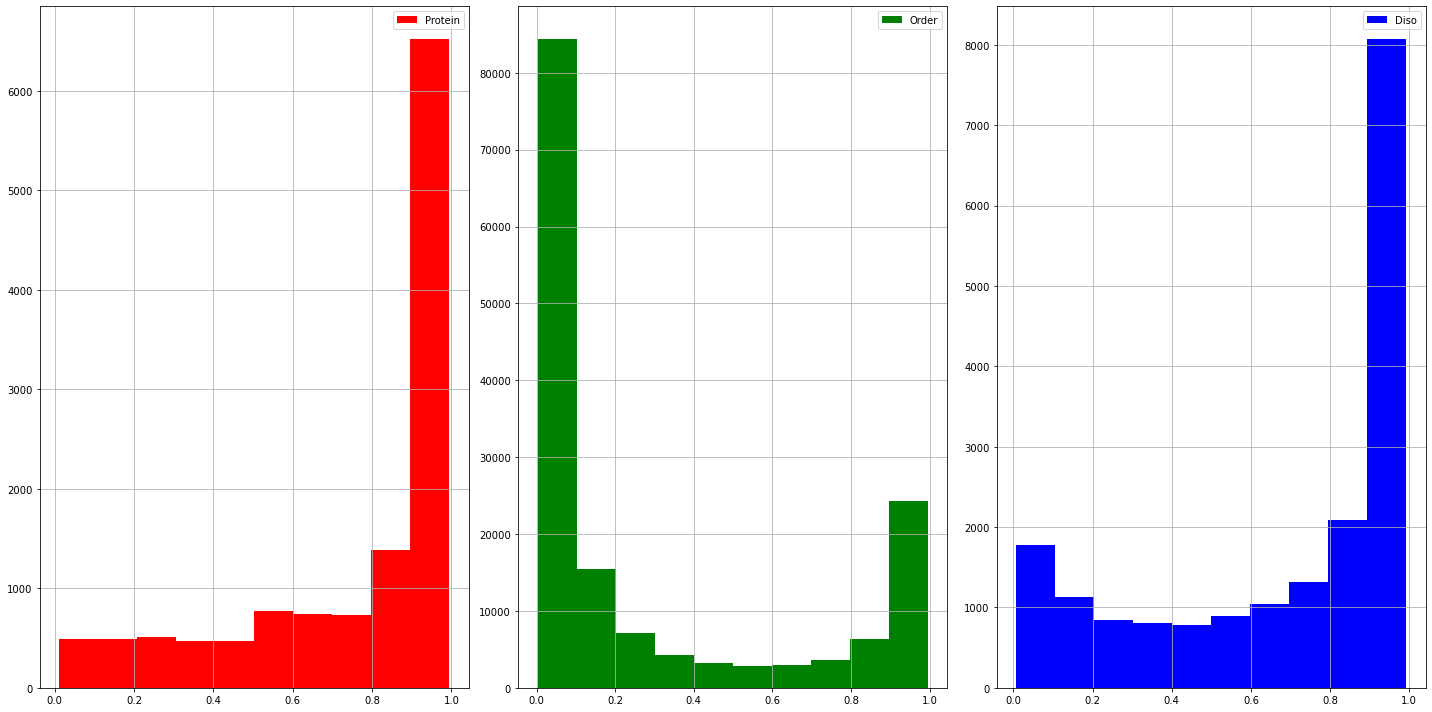

In [64]:
import matplotlib.pyplot as plt
n_bins = 10
fig, axs = plt.subplots(1, 3, sharey=False, tight_layout=True, figsize=(20,10))
axs[0].hist(Prot_Spot_Score, bins=n_bins,color='r',label='Protein')
axs[0].grid()
axs[0].legend()
axs[1].hist(Ord_Spot_Score, bins=n_bins,color='g',label='Order')
axs[1].grid()
axs[1].legend()
axs[2].hist(Diso_Spot_Score, bins=n_bins,color='b',label='Diso')
axs[2].grid()
axs[2].legend()
plt.show()

In [78]:
PDiso_IUPS_Score=[]
PDiso_IUPL_Score=[]
PDiso_EspX_Score=[]
PDiso_EspD_Score=[]
PDiso_EspN_Score=[]
PDiso_DisHL_Score=[]
PDiso_Vsl2b_Score=[]
PDiso_Glob_Score=[]
PDiso_Disopred_Score=[]
PDiso_Spot_Score=[]

POrd_IUPS_Score=[]
POrd_IUPL_Score=[]
POrd_EspX_Score=[]
POrd_EspD_Score=[]
POrd_EspN_Score=[]
POrd_DisHL_Score=[]
POrd_Vsl2b_Score=[]
POrd_Glob_Score=[]
POrd_Disopred_Score=[]
POrd_Spot_Score=[]
b=0
for b in Protein_Index:
         c=0
         for c in range(0,len(Disorder_Annotations[b]),1):
                      if Disorder_Annotations[b][c]==1:
                                       PDiso_IUPS_Score.append(IUPSScore_byProteins[b][c])
                                       PDiso_IUPL_Score.append(IUPLScore_byProteins[b][c])
                                       PDiso_EspX_Score.append(EspXScore_byProteins[b][c])
                                       PDiso_EspD_Score.append(EspDScore_byProteins[b][c])
                                       PDiso_EspN_Score.append(EspNScore_byProteins[b][c])
                                       PDiso_DisHL_Score.append(DisHLScore_byProteins[b][c])
                                       PDiso_Vsl2b_Score.append(Vsl2bScore_byProteins[b][c])
                                       PDiso_Glob_Score.append(GlobScore_byProteins[b][c])
                                       PDiso_Disopred_Score.append(DisopredScore_byProteins[b][c])
                                       PDiso_Spot_Score.append(SpotScore_byProteins[b][c])  
                      else:
                                       POrd_IUPS_Score.append(IUPSScore_byProteins[b][c])
                                       POrd_IUPL_Score.append(IUPLScore_byProteins[b][c])
                                       POrd_EspX_Score.append(EspXScore_byProteins[b][c])
                                       POrd_EspD_Score.append(EspDScore_byProteins[b][c])
                                       POrd_EspN_Score.append(EspNScore_byProteins[b][c])
                                       POrd_DisHL_Score.append(DisHLScore_byProteins[b][c])
                                       POrd_Vsl2b_Score.append(Vsl2bScore_byProteins[b][c])
                                       POrd_Glob_Score.append(GlobScore_byProteins[b][c])
                                       POrd_Disopred_Score.append(DisopredScore_byProteins[b][c])
                                       POrd_Spot_Score.append(SpotScore_byProteins[b][c])
    

In [79]:
FuncResi_Medians=pd.DataFrame({'Predictor':['DisHL','EspD','EspN','EspX','Glob','IUPL','IUPS','Vsl2b','Disopred','Spot'],                
                               'Order_Medians':[np.median(POrd_DisHL_Score),
                                               np.median(POrd_EspD_Score),
                                               np.median(POrd_EspN_Score),
                                               np.median(POrd_EspX_Score),
                                               np.median(POrd_Glob_Score),
                                               np.median(POrd_IUPL_Score),
                                               np.median(POrd_IUPS_Score),
                                               np.median(POrd_Vsl2b_Score),
                                               np.median(POrd_Disopred_Score),
                                               np.median(POrd_Spot_Score)],
                               'Diso_Medians':[np.median(PDiso_DisHL_Score),
                                               np.median(PDiso_EspD_Score),
                                               np.median(PDiso_EspN_Score),
                                               np.median(PDiso_EspX_Score),
                                               np.median(PDiso_Glob_Score),
                                               np.median(PDiso_IUPL_Score),
                                               np.median(PDiso_IUPS_Score),
                                               np.median(PDiso_Vsl2b_Score),
                                               np.median(PDiso_Disopred_Score),
                                               np.median(PDiso_Spot_Score)] })
FuncResi_Medians    

,Predictor,Order_Medians,Diso_Medians
0,DisHL,0.3280,0.448
1,EspD,0.1875,0.513
2,EspN,0.2070,0.603
3,EspX,0.0250,0.275
4,Glob,-0.0880,-0.050
5,IUPL,0.3770,0.671
6,IUPS,0.3000,0.555
7,Vsl2b,0.5350,0.871
8,Disopred,0.2710,0.840
9,Spot,0.2570,0.898


In [80]:
Disorder_List=[PDiso_IUPS_Score,
               PDiso_IUPL_Score,
               PDiso_EspX_Score,
               PDiso_EspD_Score,
               PDiso_EspN_Score,
               PDiso_DisHL_Score,
               PDiso_Vsl2b_Score,
               PDiso_Glob_Score,
               PDiso_Disopred_Score,
               PDiso_Spot_Score]                    
Order_List=[POrd_IUPS_Score,
            POrd_IUPL_Score,
            POrd_EspX_Score,
            POrd_EspD_Score,
            POrd_EspN_Score,
            POrd_DisHL_Score,
            POrd_Vsl2b_Score,
            POrd_Glob_Score,
            POrd_Disopred_Score,
            POrd_Spot_Score]                    
P_Values=[]
b=0
for b in range(0,len(Disorder_List),1):
                        A=Disorder_List[b]
                        B=Order_List[b]
                        test_stat, critical_values, siglevel = scipy.stats.anderson(A, 'norm')
                        is_normal_A = test_stat < critical_values[2]
                        test_stat, critical_values, siglevel = scipy.stats.anderson(B, 'norm')
                        is_normal_B = test_stat < critical_values[2]
                        if is_normal_A and is_normal_B:
                           # if both of them are normally distributed, we use t-test
                           test_stat, p_val = scipy.stats.ttest_ind(A, B)
                        else:
                          # else we do Anderson-Darling rank-sum test
                          t_stat, p_val = scipy.stats.ranksums(A, B)
                        P_Values.append(p_val)
DatasetAUC_Pvalues=pd.DataFrame({'Predictor':['DisHL','EspD','EspN','EspX','Glob','IUPL','IUPS','Vsl2b','Disopred','Spot'],                
                                'P Values':P_Values})
DatasetAUC_Pvalues

,Predictor,P Values
0,DisHL,0.000000e+00
1,EspD,0.000000e+00
2,EspN,0.000000e+00
3,EspX,0.000000e+00
4,Glob,0.000000e+00
5,IUPL,0.000000e+00
6,IUPS,0.000000e+00
7,Vsl2b,7.419118e-85
8,Disopred,0.000000e+00
9,Spot,0.000000e+00


In [81]:
NDiso_IUPS_Score=[]
NDiso_IUPL_Score=[]
NDiso_EspX_Score=[]
NDiso_EspD_Score=[]
NDiso_EspN_Score=[]
NDiso_DisHL_Score=[]
NDiso_Vsl2b_Score=[]
NDiso_Glob_Score=[]
NDiso_Disopred_Score=[]
NDiso_Spot_Score=[]

NOrd_IUPS_Score=[]
NOrd_IUPL_Score=[]
NOrd_EspX_Score=[]
NOrd_EspD_Score=[]
NOrd_EspN_Score=[]
NOrd_DisHL_Score=[]
NOrd_Vsl2b_Score=[]
NOrd_Glob_Score=[]
NOrd_Disopred_Score=[]
NOrd_Spot_Score=[]
b=0
for b in NonProtein_Index:
         c=0
         for c in range(0,len(Disorder_Annotations[b]),1):
                      if Disorder_Annotations[b][c]==1:
                                       NDiso_IUPS_Score.append(IUPSScore_byProteins[b][c])
                                       NDiso_IUPL_Score.append(IUPLScore_byProteins[b][c])
                                       NDiso_EspX_Score.append(EspXScore_byProteins[b][c])
                                       NDiso_EspD_Score.append(EspDScore_byProteins[b][c])
                                       NDiso_EspN_Score.append(EspNScore_byProteins[b][c])
                                       NDiso_DisHL_Score.append(DisHLScore_byProteins[b][c])
                                       NDiso_Vsl2b_Score.append(Vsl2bScore_byProteins[b][c])
                                       NDiso_Glob_Score.append(GlobScore_byProteins[b][c])
                                       NDiso_Disopred_Score.append(DisopredScore_byProteins[b][c])
                                       NDiso_Spot_Score.append(SpotScore_byProteins[b][c])  
                      else:
                                       NOrd_IUPS_Score.append(IUPSScore_byProteins[b][c])
                                       NOrd_IUPL_Score.append(IUPLScore_byProteins[b][c])
                                       NOrd_EspX_Score.append(EspXScore_byProteins[b][c])
                                       NOrd_EspD_Score.append(EspDScore_byProteins[b][c])
                                       NOrd_EspN_Score.append(EspNScore_byProteins[b][c])
                                       NOrd_DisHL_Score.append(DisHLScore_byProteins[b][c])
                                       NOrd_Vsl2b_Score.append(Vsl2bScore_byProteins[b][c])
                                       NOrd_Glob_Score.append(GlobScore_byProteins[b][c])
                                       NOrd_Disopred_Score.append(DisopredScore_byProteins[b][c])
                                       NOrd_Spot_Score.append(SpotScore_byProteins[b][c])
    

In [82]:
FuncResi_Medians=pd.DataFrame({'Predictor':['DisHL','EspD','EspN','EspX','Glob','IUPL','IUPS','Vsl2b','Disopred','Spot'],                
                               'Order_Medians':[np.median(NOrd_DisHL_Score),
                                               np.median(NOrd_EspD_Score),
                                               np.median(NOrd_EspN_Score),
                                               np.median(NOrd_EspX_Score),
                                               np.median(NOrd_Glob_Score),
                                               np.median(NOrd_IUPL_Score),
                                               np.median(NOrd_IUPS_Score),
                                               np.median(NOrd_Vsl2b_Score),
                                               np.median(NOrd_Disopred_Score),
                                               np.median(NOrd_Spot_Score)],
                               'Diso_Medians':[np.median(NDiso_DisHL_Score),
                                               np.median(NDiso_EspD_Score),
                                               np.median(NDiso_EspN_Score),
                                               np.median(NDiso_EspX_Score),
                                               np.median(NDiso_Glob_Score),
                                               np.median(NDiso_IUPL_Score),
                                               np.median(NDiso_IUPS_Score),
                                               np.median(NDiso_Vsl2b_Score),
                                               np.median(NDiso_Disopred_Score),
                                               np.median(NDiso_Spot_Score)] })
FuncResi_Medians    

,Predictor,Order_Medians,Diso_Medians
0,DisHL,0.285,0.481
1,EspD,0.102,0.484
2,EspN,0.121,0.593
3,EspX,0.015,0.240
4,Glob,-0.094,-0.050
5,IUPL,0.233,0.643
6,IUPS,0.180,0.562
7,Vsl2b,0.373,0.855
8,Disopred,0.045,0.788
9,Spot,0.057,0.839


In [86]:
Disorder_List=[POrd_IUPS_Score,
            POrd_IUPL_Score,
            POrd_EspX_Score,
            POrd_EspD_Score,
            POrd_EspN_Score,
            POrd_DisHL_Score,
            POrd_Vsl2b_Score,
            POrd_Glob_Score,
            POrd_Disopred_Score,
            POrd_Spot_Score]                    
Order_List=[NOrd_IUPS_Score,
            NOrd_IUPL_Score,
            NOrd_EspX_Score,
            NOrd_EspD_Score,
            NOrd_EspN_Score,
            NOrd_DisHL_Score,
            NOrd_Vsl2b_Score,
            NOrd_Glob_Score,
            NOrd_Disopred_Score,
            NOrd_Spot_Score]                    
P_Values=[]
b=0
for b in range(0,len(Disorder_List),1):
                        A=Disorder_List[b]
                        B=Order_List[b]
                        test_stat, critical_values, siglevel = scipy.stats.anderson(A, 'norm')
                        is_normal_A = test_stat < critical_values[2]
                        test_stat, critical_values, siglevel = scipy.stats.anderson(B, 'norm')
                        is_normal_B = test_stat < critical_values[2]
                        if is_normal_A and is_normal_B:
                           # if both of them are normally distributed, we use t-test
                           test_stat, p_val = scipy.stats.ttest_ind(A, B)
                        else:
                          # else we do Anderson-Darling rank-sum test
                          t_stat, p_val = scipy.stats.ranksums(A, B)
                        P_Values.append(p_val)
DatasetAUC_Pvalues=pd.DataFrame({'Predictor':['DisHL','EspD','EspN','EspX','Glob','IUPL','IUPS','Vsl2b','Disopred','Spot'],                
                                'P Values':P_Values})
DatasetAUC_Pvalues

,Predictor,P Values
0,DisHL,0.000000e+00
1,EspD,0.000000e+00
2,EspN,0.000000e+00
3,EspX,0.000000e+00
4,Glob,0.000000e+00
5,IUPL,0.000000e+00
6,IUPS,0.000000e+00
7,Vsl2b,3.611956e-16
8,Disopred,0.000000e+00
9,Spot,0.000000e+00


In [87]:
Disorder_List=[NDiso_IUPS_Score,
               NDiso_IUPL_Score,
               NDiso_EspX_Score,
               NDiso_EspD_Score,
               NDiso_EspN_Score,
               NDiso_DisHL_Score,
               NDiso_Vsl2b_Score,
               NDiso_Glob_Score,
               NDiso_Disopred_Score,
               NDiso_Spot_Score]                    
Order_List=[PDiso_IUPS_Score,
               PDiso_IUPL_Score,
               PDiso_EspX_Score,
               PDiso_EspD_Score,
               PDiso_EspN_Score,
               PDiso_DisHL_Score,
               PDiso_Vsl2b_Score,
               PDiso_Glob_Score,
               PDiso_Disopred_Score,
               PDiso_Spot_Score]                    
P_Values=[]
b=0
for b in range(0,len(Disorder_List),1):
                        A=Disorder_List[b]
                        B=Order_List[b]
                        test_stat, critical_values, siglevel = scipy.stats.anderson(A, 'norm')
                        is_normal_A = test_stat < critical_values[2]
                        test_stat, critical_values, siglevel = scipy.stats.anderson(B, 'norm')
                        is_normal_B = test_stat < critical_values[2]
                        if is_normal_A and is_normal_B:
                           # if both of them are normally distributed, we use t-test
                           test_stat, p_val = scipy.stats.ttest_ind(A, B)
                        else:
                          # else we do Anderson-Darling rank-sum test
                          t_stat, p_val = scipy.stats.ranksums(A, B)
                        P_Values.append(p_val)
DatasetAUC_Pvalues=pd.DataFrame({'Predictor':['DisHL','EspD','EspN','EspX','Glob','IUPL','IUPS','Vsl2b','Disopred','Spot'],                
                                'P Values':P_Values})
DatasetAUC_Pvalues

,Predictor,P Values
0,DisHL,5.519334e-02
1,EspD,2.997342e-21
2,EspN,4.154057e-05
3,EspX,3.313664e-33
4,Glob,5.770646e-01
5,IUPL,8.983937e-22
6,IUPS,1.100393e-07
7,Vsl2b,2.096619e-04
8,Disopred,1.098545e-48
9,Spot,1.091855e-95
